In [1]:
import scienceplots
import latex
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%capture

# Make sure to add project root directory to PYTHONPATH
# export PYTHONPATH="${PYTHONPATH}:${pwd}"

# Change directory to project root directory

%cd ..

In [3]:
from src.woa.temperature import (
    LinearTemperatureDecay,
    SigmoidTemperatureDecay,
    CosineTemperatureDecay,
    PowerTemperatureDecay,
    ExponentialTemperatureDecay
)

In [4]:
plt.style.use(["science"])

In [5]:
max_iterations = 30
max_temp = 1.0
min_temp = 0.5
iterations = np.arange(0, max_iterations)

In [6]:
linear_decay = LinearTemperatureDecay(
    min_temp, max_temp, max_iterations
).get(iterations)


exponential_decay = ExponentialTemperatureDecay(
    min_temp, max_temp, max_iterations
).get(iterations)

sigmoid_decay = SigmoidTemperatureDecay(
    min_temp, max_temp, max_iterations, alpha=10.0
).get(iterations)

cosine_decay = CosineTemperatureDecay(
    min_temp, max_temp, max_iterations
).get(iterations)

power_decay_2_5_beta = PowerTemperatureDecay(
    min_temp, max_temp, max_iterations, beta=2.5
).get(iterations)

power_decay_5_beta = PowerTemperatureDecay(
    min_temp, max_temp, max_iterations, beta=5.0
).get(iterations)

power_decay_10_beta = PowerTemperatureDecay(
    min_temp, max_temp, max_iterations, beta=10.0
).get(iterations)

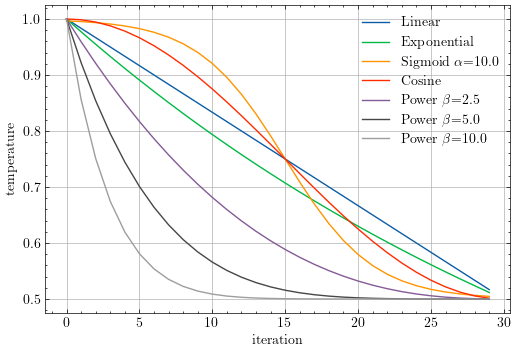

In [7]:
plt.figure(figsize=(6, 4))

plt.plot(iterations, linear_decay, label='Linear')
plt.plot(iterations, exponential_decay, label='Exponential')
plt.plot(iterations, sigmoid_decay,label=r'Sigmoid $\alpha$=10.0')
plt.plot(iterations, cosine_decay, label='Cosine')
plt.plot(iterations, power_decay_2_5_beta, label=r'Power $\beta$=2.5')
plt.plot(iterations, power_decay_5_beta, label=r'Power $\beta$=5.0')
plt.plot(iterations, power_decay_10_beta, label=r'Power $\beta$=10.0')

plt.xlabel('iteration')
plt.ylabel('temperature')
plt.legend()
plt.grid(True)
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
/var/folders/v2/tn30zgm13l364d0wn_b2lr0w0000gn/T/ipykernel_70562/3091381332.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lambda$', fontsize=14, rotation=0, labelpad=10)


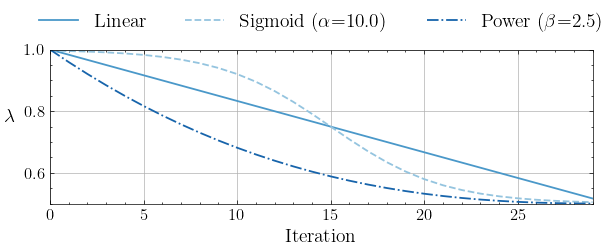

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 2))

# Create a palette of grayscale colors
colors = sns.color_palette("Blues", 4)

plt.rcParams.update(
    {
        "font.size": 9,  # General font size
        "axes.titlesize": 7.5,  # Axis title font size
        "axes.labelsize": 8,  # X and Y axis labels
        "xtick.labelsize": 12,  # X-axis tick labels
        "ytick.labelsize": 12,  # Y-axis tick labels
        "legend.fontsize": 6,  # Legend font size
        "axes.linewidth": 0.5,  # Axis line thickness
        "grid.linewidth": 0.5,  # Grid line thickness
    }
)

# Plotting with different line styles
plt.plot(iterations, linear_decay, label='Linear', c=colors[2], linewidth=1.3, linestyle='-')
plt.plot(iterations, sigmoid_decay, label=r'Sigmoid ($\alpha$=10.0)', c=colors[1], linewidth=1.3, linestyle='--')
plt.plot(iterations, power_decay_2_5_beta, label=r'Power ($\beta$=2.5)', c=colors[3], linewidth=1.3, linestyle='-.')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('$\lambda$', fontsize=14, rotation=0, labelpad=10)

# Adjusting legend position and font size
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize=14)

# Adjusting font size for the grid and ticks
plt.tick_params(axis='both')

plt.grid(True)
plt.ylim([0.5, 1.0])
plt.xlim([0, 29])

plt.savefig('temperature_decay_functions_v2.pdf', dpi=1500, format='pdf')
plt.show()